In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix

Load the data:

In [2]:
df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Use a classifier.

Extra Trees Classifier was selected:

In [3]:
clf = ExtraTreesClassifier(n_estimators = 1000, max_depth = 4)

Convert to dummies and delete 'y_no' and 'duration' columns:

In [4]:
df_dummies = pd.get_dummies(df)
del df_dummies['duration']
del df_dummies['y_no']

print(df_dummies.keys())

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

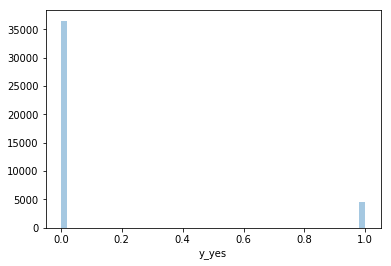

In [5]:
sns.distplot(df_dummies['y_yes'], kde = False)

In [6]:
df_X = df_dummies[df_dummies.keys()[:-1]]

df_y = df_dummies[df_dummies.keys()[-1:]]

X = df_X.values
y = np.transpose(df_y.values)[0]

Report results of 10-Fold Cross Validation:

In [7]:
score = []

k_fold = KFold(n_splits=10)
for train_indices, test_indices in k_fold.split(X, y):
    clf.fit(X[train_indices], y[train_indices])
    score.append(clf.score(X[test_indices], y[test_indices]))
print('Average accuracy: {} %'.format(np.mean(score)*100))

Average accuracy: 88.7724862372113 %


### Confusion Matrix:

In [8]:
#Taken from lab practice

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
        #print t
#         plt.text(j, i, t,
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


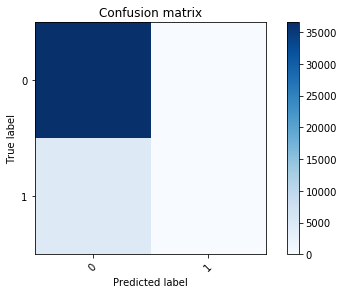

In [9]:
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize = False, title='Confusion matrix')

### Feature Importance:

[ 4  8  7 49  2 61  6  5 44 48 50 52 43 42 33 34 59 51 17 45 47 31 56  0
 14 10 23 60 55 54 58 22  3  1 27  9 18 57 30 28 16 39 36 25 32 40 21 41
 37 26 38 20 12 15 24 11 13 19 46 29 53 35]
Feature ranking:
1. emp.var.rate (0.138909)
2. nr.employed (0.122412)
3. euribor3m (0.112402)
4. month_mar (0.074875)
5. pdays (0.069397)
6. poutcome_success (0.065204)
7. cons.conf.idx (0.051819)
8. cons.price.idx (0.048375)
9. month_apr (0.045447)
10. month_jun (0.040255)
11. month_may (0.039784)
12. month_oct (0.039734)
13. contact_telephone (0.025126)
14. contact_cellular (0.023805)
15. default_no (0.010741)
16. default_unknown (0.009617)
17. poutcome_failure (0.009373)
18. month_nov (0.007478)
19. job_student (0.006497)
20. month_aug (0.005310)
21. month_jul (0.005260)
22. education_university.degree (0.004574)
23. day_of_week_thu (0.004149)
24. age (0.003948)
25. job_retired (0.003705)
26. job_blue-collar (0.003686)
27. marital_single (0.003572)
28. poutcome_nonexistent (0.003245)
29. day_of_w

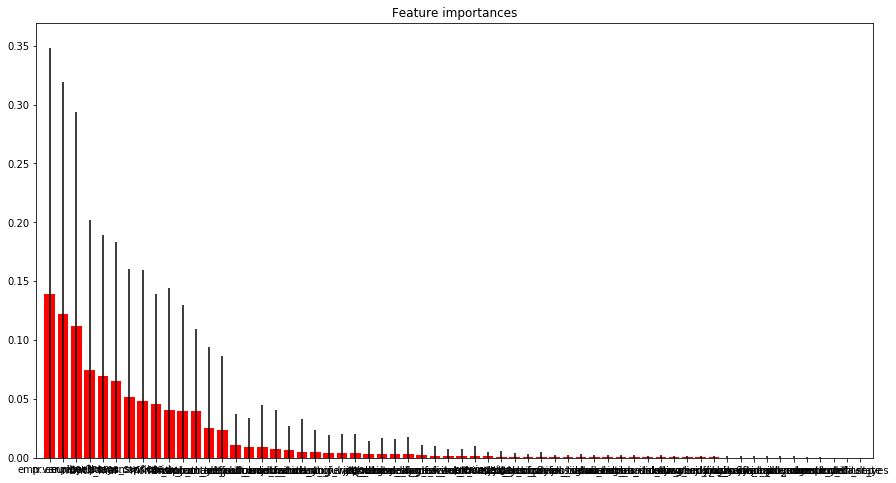

In [10]:
importances = clf.feature_importances_
features = df_dummies.keys()[:-1]
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

plt.savefig("bank_FeatImportances.png",bbox_inches='tight')
plt.savefig("bank_FeatImportances.pdf",bbox_inches='tight')